### Resources
- https://en.wikipedia.org/wiki/Kernel_regression
- https://mccormickml.com/2014/02/26/kernel-regression/
- http://youngmok.com/gaussian-kernel-regression-with-matlab-code/?utm_source=pocket_mylist

## Gausian kernel regression

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
x = np.linspace(0, 100)
y = np.sin(x/10) + (x/50)** 2

y_noisy = y + 0.2 * np.random.randint(0, 100)

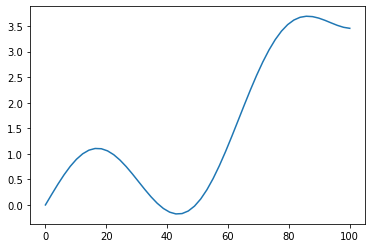

In [35]:
plt.plot(x, y)

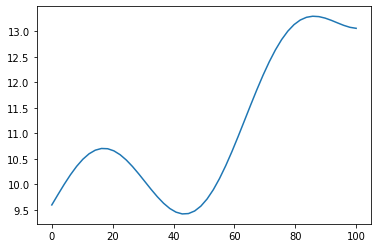

In [36]:
plt.plot(x, y_noisy)

In [74]:
sigma = 3
kernel = lambda z: np.exp(-z * z/ 2) / np.sqrt(2 * np.pi)
function = lambda point, x: kernel((x-point)/sigma)
gaussian_kernel_reg = lambda point, x, y: np.sum(function(point, x) * y) * np.sum(function(point, x))

In [75]:
kernel_regression = []
for i in range(len(y_noisy)):
    kernel_regression.append(
        gaussian_kernel_reg(
            y_noisy[i],
            x,
            y
        )
    )

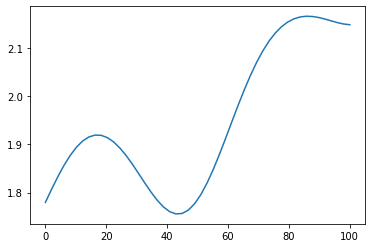

In [77]:
plt.plot(x, np.asarray(kernel_regression))

### Error plot

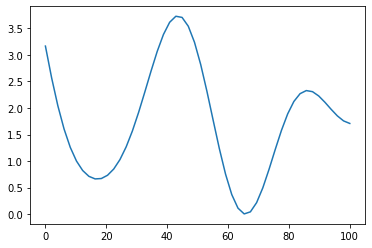

In [78]:
plt.plot(x, (np.asarray(kernel_regression) - y) ** 2)

### Priestley–Chao kernel estimator

https://en.wikipedia.org/wiki/Kernel_regression#Priestley%E2%80%93Chao_kernel_estimator

In [171]:
def kernel_estimator(x_i_y_i):
    index, x_i =  x_i_y_i
    query_x =  (x[2:] - x_i)/sigma 
    x_delta = x[2:] - x[1:-1]
    sum_y = 1/sigma * \
        np.sum([
            i * np.exp(
                - (
                    (
                        (x[index + 2] - x_i) ** 2 
                    ) ** 2
                ) / (2 * sigma ** 2)
            )
            * y[index]
            for index, i in enumerate(x_delta)
        ])
    return sum_y

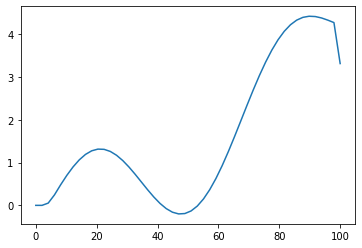

In [172]:
plt.plot(x, np.array(list(map(kernel_estimator, list(enumerate(x))))))